In [42]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
import time
import string

# jokes = set()
# valid_chars = set(string.printable)  # Set of printable ASCII characters
# # Set up Selenium webdriver
# driver = webdriver.Chrome()  
# driver.get("https://www.rd.com/jokes/animal-puns/")

# # Parse text from website
# soup = BeautifulSoup(driver.page_source, "html.parser")  
# joke_txt = soup.find_all("div", attrs={"class":"joke-text-holder"}) 

# for joke in joke_txt:
#     text = joke.text.strip()
#     # Replace backslash and newline characters
#     text = text.replace('\n', ' ')
#     if set(text).issubset(valid_chars):
#         jokes.add(text)
#     print(len(jokes))

# # Write the jokes to a txt file
# with open('yo_momma_jokes.txt', 'w') as f:
#     f.write("Yo Momma Jokes\n\n")
#     for joke in jokes:
#         f.write(joke + "\n\n")


animal_jokes.txt: 10252 non-empty lines
bad_jokes.txt: 70 non-empty lines
bar_jokes.txt: 31 non-empty lines
bird_jokes.txt: 12 non-empty lines
birthday_jokes.txt: 48 non-empty lines
blonde_jokes.txt: 10037 non-empty lines
boycott_these_jokes.txt: 10030 non-empty lines
cat_jokes.txt: 65 non-empty lines
christmas_jokes.txt: 9 non-empty lines
clean_jokes.txt: 10275 non-empty lines
coffee_jokes.txt: 30 non-empty lines
computer_jokes.txt: 72 non-empty lines
corny_jokes.txt: 176 non-empty lines
customer_service_jokes.txt: 56 non-empty lines
cute_jokes.txt: 24 non-empty lines
daily_life_jokes.txt: 26 non-empty lines
dentist_jokes.txt: 10 non-empty lines
diet_jokes.txt: 73 non-empty lines
dinosaur_jokes.txt: 17 non-empty lines
dirty_jokes.txt: 83 non-empty lines
disabled_jokes.txt: 26 non-empty lines
doctor_jokes.txt: 74 non-empty lines
dog_jokes.txt: 43 non-empty lines
duck_jokes.txt: 9 non-empty lines
dumb_jokes.txt: 76 non-empty lines
easter_jokes.txt: 22 non-empty lines
elephant_jokes.txt:

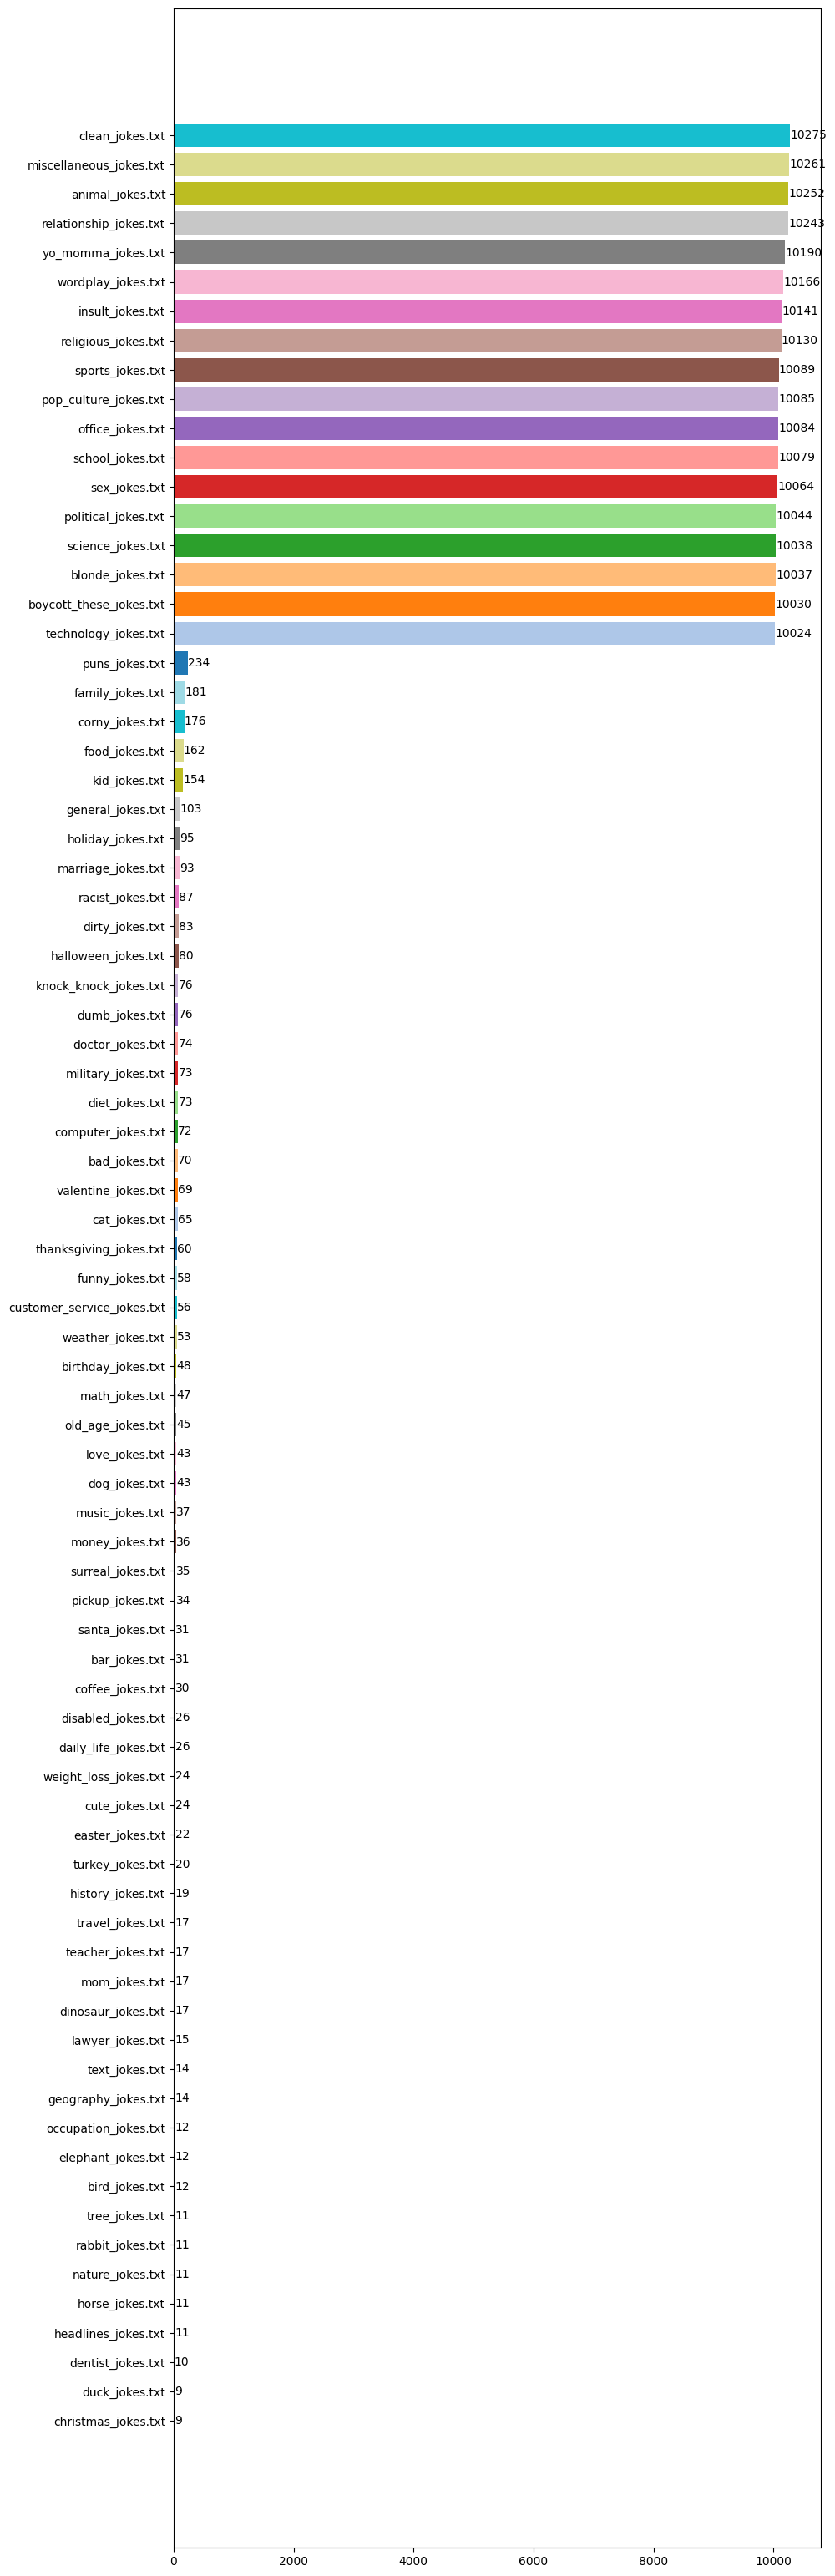

In [1]:
import os
import matplotlib.pyplot as plt

folder_path = 'jokes'
data = {}
total_non_empty_lines = 0
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as f:
            next(f)
            non_empty_lines = sum(1 for line in f if line.strip())
        print(f'{filename}: {non_empty_lines} non-empty lines')
        data[filename] = non_empty_lines
        total_non_empty_lines += non_empty_lines

# print the total number of non-empty lines
print(f'Total non-empty lines: {total_non_empty_lines}')

# sort the data in ascending order
data = dict(sorted(data.items(), key=lambda item: item[1]))

# create the bar chart
names = list(data.keys())
values = list(data.values())
fig, ax = plt.subplots(figsize=(10, len(names) * 0.5))
bars = ax.barh(names, values, color=plt.cm.tab20.colors)

# add labels to the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 3
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, width, ha='left', va='center')

# save the chart to a file
plt.show()

In [6]:
import os
import json

def convert_jokes(directory, output_file):
    with open(output_file, 'w', encoding='utf-8') as outfile:
        for filename in os.listdir(directory):
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
                lines = file.readlines()
                prompt = lines[0].strip()
                for line in lines[2:]:
                    if line.strip():
                        completion = line.strip()
                        joke = {"prompt": prompt + " ->", "completion": completion}
                        outfile.write(json.dumps(joke) + ',')


convert_jokes('jokes', 'output.json')

In [3]:
import openai

with open("output_prepared.jsonl", encoding='utf-8') as f:
  response = openai.File.create(file=f, purpose='fine-tune')
  print(response)

{
  "object": "file",
  "id": "file-KMCEg6mRutVIc5rOtycq0WhP",
  "purpose": "fine-tune",
  "filename": "file",
  "bytes": 1376519,
  "created_at": 1692175956,
  "status": "uploaded",
  "status_details": null
}


In [4]:
response = openai.FineTune.create(training_file="file-KMCEg6mRutVIc5rOtycq0WhP", model='davinci')
print(response)

{
  "object": "fine-tune",
  "id": "ft-QIA1rv5cVlKsD0D91OAxAm11",
  "hyperparams": {
    "n_epochs": 4,
    "batch_size": null,
    "prompt_loss_weight": 0.01,
    "learning_rate_multiplier": null
  },
  "organization_id": "org-51lwmkFDpxzyfaUNiyczPCxH",
  "model": "davinci",
  "training_files": [
    {
      "object": "file",
      "id": "file-KMCEg6mRutVIc5rOtycq0WhP",
      "purpose": "fine-tune",
      "filename": "file",
      "bytes": 1376519,
      "created_at": 1692175956,
      "status": "processed",
      "status_details": null
    }
  ],
  "validation_files": [],
  "result_files": [],
  "created_at": 1692176203,
  "updated_at": 1692176203,
  "status": "pending",
  "fine_tuned_model": null,
  "events": [
    {
      "object": "fine-tune-event",
      "level": "info",
      "message": "Created fine-tune: ft-QIA1rv5cVlKsD0D91OAxAm11",
      "created_at": 1692176203
    }
  ]
}


In [7]:
response = openai.FineTune.retrieve(id="ft-4o8PwVoIJfEQC7iWJmLnMVfz")
print(response)

{
  "object": "fine-tune",
  "id": "ft-4o8PwVoIJfEQC7iWJmLnMVfz",
  "hyperparams": {
    "n_epochs": 4,
    "batch_size": null,
    "prompt_loss_weight": 0.01,
    "learning_rate_multiplier": null
  },
  "organization_id": "org-51lwmkFDpxzyfaUNiyczPCxH",
  "model": "davinci",
  "training_files": [
    {
      "object": "file",
      "id": "file-CBEyk8ff9ZA0FpkriMkfRjyM",
      "purpose": "fine-tune",
      "filename": "c:/Users/User/Downloads/JokeBotV2/output_prepared.jsonl",
      "bytes": 1376519,
      "created_at": 1692177011,
      "status": "processed",
      "status_details": null
    }
  ],
  "validation_files": [],
  "result_files": [],
  "created_at": 1692177012,
  "updated_at": 1692177012,
  "status": "pending",
  "fine_tuned_model": null,
  "events": [
    {
      "object": "fine-tune-event",
      "level": "info",
      "message": "Created fine-tune: ft-4o8PwVoIJfEQC7iWJmLnMVfz",
      "created_at": 1692177012
    }
  ]
}


In [47]:
# jokes = set()
# valid_chars = set(string.printable)  # Set of printable ASCII characters

# # Set up Selenium webdriver
# driver = webdriver.Chrome()
# driver.get("https://www.funnyshortjokes.com/c/animal-jokes")

# # Scroll to the bottom of the page to load all jokes
# last_height = driver.execute_script("return document.body.scrollHeight")
# while True:
#     driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#     time.sleep(5)
#     new_height = driver.execute_script("return document.body.scrollHeight")
#     if new_height == last_height:
#         break
#     last_height = new_height
#     time.sleep(5)

# # Parse text from website
# soup = BeautifulSoup(driver.page_source, "html.parser")
# joke_txt = soup.find_all("div", attrs={"class":"post-text"})

# for joke in joke_txt:
#     text = joke.text.strip()
#     # Replace backslash and newline characters
#     text = text.replace('\n', ' ')
#     if set(text).issubset(valid_chars):
#         jokes.add(text)
#     print(len(jokes))

# # Write the jokes to a txt file
# with open('animal_jokes.txt', 'a') as f:
#     for joke in jokes:
#         f.write(joke + "\n\n")

0
0
1
1
1
1


In [379]:
jokes = set()
valid_chars = set(string.printable)  # Set of printable ASCII characters

# Set up Selenium webdriver
driver = webdriver.Chrome()
driver.get("https://www.funnyshortjokes.com/c/pick-up-lines/page/12")

# Scroll to the bottom of the page to load all jokes
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

# Parse text from website
soup = BeautifulSoup(driver.page_source, "html.parser")
joke_txt = soup.find_all("div", attrs={"class":"post-text"})

for joke in joke_txt:
    text = joke.text.strip()
    # Replace backslash and newline characters
    text = text.replace('\n', ' ')
    if set(text).issubset(valid_chars):
        jokes.add(text)
    print(len(jokes))

# Write the jokes to a txt file
with open('jokes/pickup_jokes.txt', 'a') as f:
    for joke in jokes:
        f.write(joke + "\n\n")

1
1
2
3
3
4


In [43]:
# filename = 'jokes/teacher_jokes.txt'

# # Read the contents of the file
# with open(filename, 'r') as f:
#     lines = f.readlines()

# # Combine every two lines into one
# updated_lines = []
# for i in range(0, len(lines), 3):
#     line1 = lines[i].strip()
#     line2 = lines[i+1].strip()
#     updated_line = f"{line1} {line2}\n\n"
#     updated_lines.append(updated_line)

# # Write the updated content back to the file
# with open(filename, 'w') as f:
#     f.writelines(updated_lines)